In [26]:
#We now want to add acceptance rate and entrance rate to our data file

import pandas as pd

#Read the CSV file into a Pandas DataFrame
df = pd.read_csv("Data/Florian_Wirtz_eigentlich_noch_was_mit_der.csv")

years = ['2019', '2020', '2021', '2022', '2023']

# Calculate acceptance rate and entrance rate for each year
for year in years:
    apps_col = f'Applications {year}'
    offers_col = f'Offers {year}'
    entrants_col = f'Entrances {year}'
    accept_rate_col = f'Acceptance Rate {year}'
    entrance_rate_col = f'Entrance Rate {year}'
    
    # Calculate acceptance rate: offers / applications
    df[accept_rate_col] = df[offers_col] / df[apps_col]
    
    # Calculate entrance rate: entrants / offers
    df[entrance_rate_col] = df[entrants_col] / df[offers_col]

df.to_csv("Data/MAXI.csv", index=False)

In [27]:
# Now we want to filter out the european students, in our data they are characterized by nationality
import csv

# Define the file paths, downloaded these csv files from GITHUB
eu_countries_file = "Data/EU-countries.csv"
nationalities_file = "Data/countries.csv"

# Initialize a set to store European nationalities
EU_nationalities = set()

# get EU countries from the CSV file
eu_countries = set()
with open(eu_countries_file, newline='', encoding='utf-8') as csvfile:
    reader = csv.reader(csvfile)
    next(reader)  # Skip header
    for row in reader:
        country_name = row[2].strip()  # country name is in first column
        eu_countries.add(country_name)

# Read the nationalities from the CSV file and filter European nationalities
with open(nationalities_file, newline='', encoding='utf-8') as csvfile:
    reader = csv.reader(csvfile)
    next(reader) 
    for row in reader:
        country_name = row[3].strip()  # country name is in fourth column
        if country_name in eu_countries: 
            EU_nationalities.add(row[4])  # nationality is in fifth column
# check if all countries are there(should be 27)            
print(len(EU_nationalities))

27


In [36]:
#Now we change the CSV file with the acceptance rates so it oonly includes EU students

# Define the file paths
input_csv_file = "Data/MAXI.csv" 
output_csv_file = "Data/EU_students_acceptance_by_department.csv"  

# Open the input CSV file for reading and the output CSV file for writing
with open(input_csv_file, newline='', encoding='utf-8') as input_file, \
     open(output_csv_file, 'w', newline='', encoding='utf-8') as output_file:
    # Create CSV reader and writer objects
    reader = csv.reader(input_file)
    writer = csv.writer(output_file)

    # Read and write the first header row to the output file
    first_header = next(reader)
    writer.writerow(first_header)

    # Iterate over each row in the input CSV file
    for row in reader:
        # Check if the nationality in the first column is in the list of European nationalities
        if row[0].strip() in EU_nationalities:
            # Write the row to the output CSV file
            writer.writerow(row)


In [37]:
# Read the CSV file into a Pandas DataFrame
data = pd.read_csv("Data/EU_students_acceptance_by_department.csv")
data

,Nationality,Department,Program,Applications 2019,Offers 2019,Entrances 2019,Applications 2020,Offers 2020,Entrances 2020,Applications 2021,...,Acceptance Rate 2019,Entrance Rate 2019,Acceptance Rate 2020,Entrance Rate 2020,Acceptance Rate 2021,Entrance Rate 2021,Acceptance Rate 2022,Entrance Rate 2022,Acceptance Rate 2023,Entrance Rate 2023
0,Austrian,Accounting,UG Degree,7.0,0.0,0.0,6.0,0.0,0.0,2.5,...,0.0000,NaN,0.0,NaN,0.0,NaN,0.00,NaN,0.0,NaN
1,Austrian,Accounting,PG Taught,8.0,2.5,2.5,5.0,2.5,0.0,5.0,...,0.3125,1.0,0.5,0.0,0.5,0.0,0.25,1.0,1.0,1.0
2,Austrian,Anthropology,UG Degree,2.5,2.5,0.0,2.5,2.5,0.0,2.5,...,1.0000,0.0,1.0,0.0,0.0,NaN,1.00,1.0,NaN,NaN
3,Austrian,Anthropology,PG Taught,0.0,0.0,0.0,2.5,2.5,2.5,0.0,...,NaN,NaN,1.0,1.0,NaN,NaN,0.00,NaN,NaN,NaN
4,Austrian,Economic History,UG Degree,5.0,2.5,2.5,2.5,0.0,0.0,0.0,...,0.5000,1.0,0.0,NaN,NaN,NaN,1.00,1.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,Swedish,Social Policy,PG Taught,2.5,0.0,0.0,2.5,2.5,2.5,2.5,...,0.0000,NaN,1.0,1.0,1.0,1.0,NaN,NaN,0.5,1.0
843,Swedish,Sociology,UG Degree,2.5,2.5,0.0,5.0,2.5,0.0,2.5,...,1.0000,0.0,0.5,0.0,0.0,NaN,NaN,NaN,NaN,NaN
844,Swedish,Sociology,PG Taught,10.0,2.5,2.5,10.0,5.0,2.5,2.5,...,0.2500,1.0,0.5,0.5,1.0,0.0,1.00,1.0,0.5,1.0
845,Swedish,Statistics,UG Degree,2.5,0.0,0.0,2.5,0.0,0.0,2.5,...,0.0000,NaN,0.0,NaN,1.0,1.0,1.00,1.0,0.0,NaN


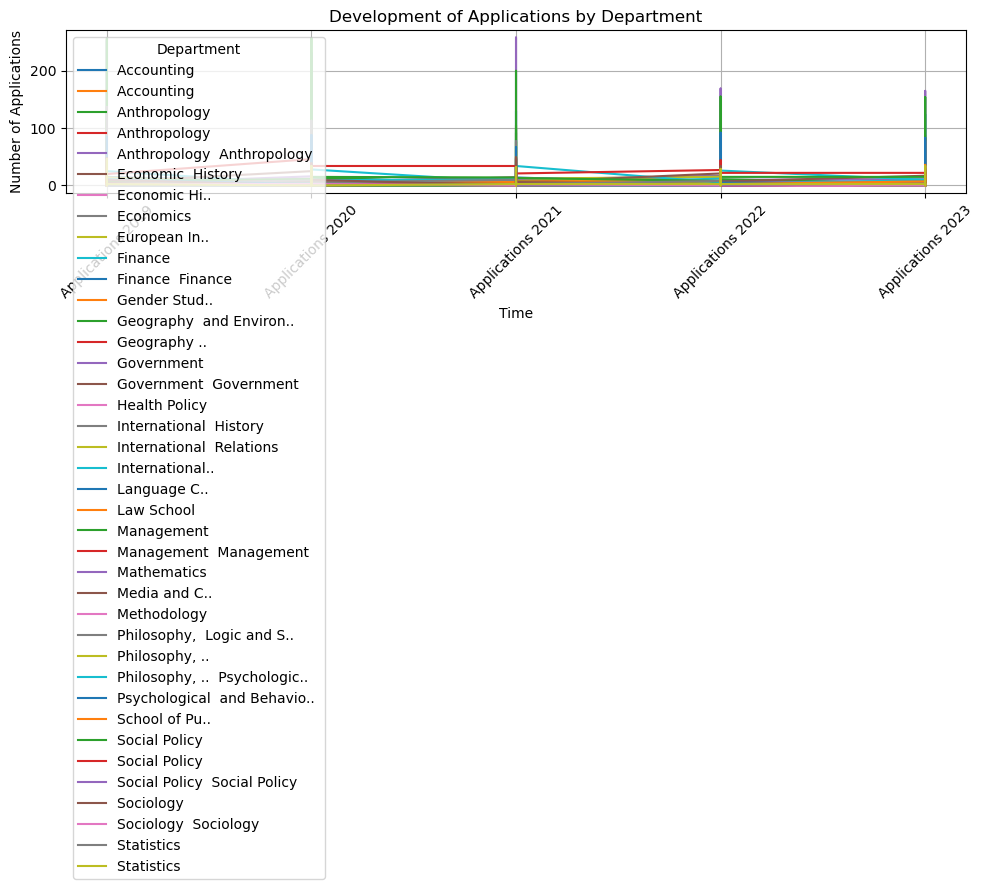

In [30]:
import matplotlib.pyplot as plt

# Read the CSV file into a Pandas DataFrame
df = pd.read_csv("Data/EU_students_acceptance_by_department.csv")

# Extract the columns of interest (4th, 7th, 10th, 13th, and 16th columns)
columns_of_interest = df.columns[[3, 6, 9, 12, 15]]

# Melt the DataFrame to unpivot the data
df_melted = df.melt(id_vars=[df.columns[1]], value_vars=columns_of_interest, var_name='Time', value_name='Applications')

# Plot the development of applications for each department over time
plt.figure(figsize=(10, 6))
for department, data in df_melted.groupby('Department'):
    plt.plot(data['Time'], data['Applications'], label=department)

plt.title('Development of Applications by Department')
plt.xlabel('Time')
plt.ylabel('Number of Applications')
plt.grid(True)
plt.legend(title='Department', loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


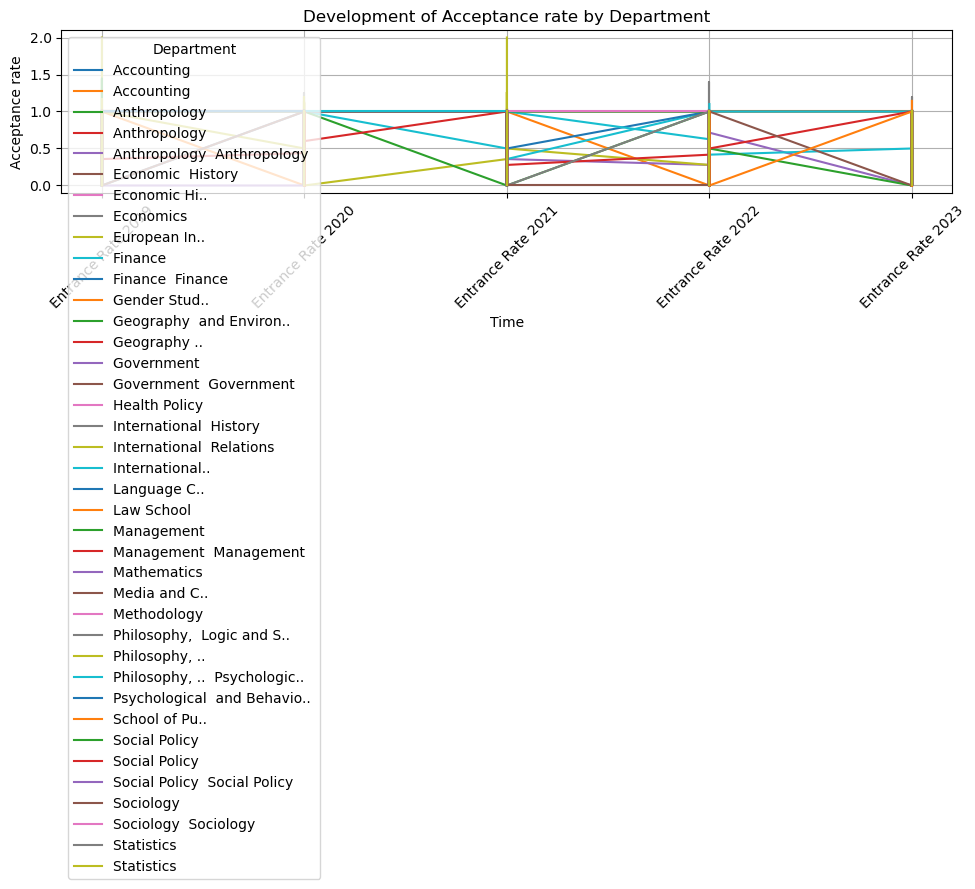

In [31]:

# Extract the columns of interest
columns_of_interest = df.columns[[19, 21, 23, 25, 27]]

# Melt the DataFrame to unpivot the data
df_melted = df.melt(id_vars=[df.columns[1]], value_vars=columns_of_interest, var_name='Time', value_name='Acceptance rate')

# Plot the development of applications for each department over time
plt.figure(figsize=(10, 6))
for department, data in df_melted.groupby('Department'):
    plt.plot(data['Time'], data['Acceptance rate'], label=department)

plt.title('Development of Acceptance rate by Department')
plt.xlabel('Time')
plt.ylabel('Acceptance rate')
plt.grid(True)
plt.legend(title='Department', loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [35]:
import plotly.express as px
import re

# Melt the DataFrame to have one row per application type and year
df_melted = pd.melt(df, id_vars=['Department', 'Program'], 
                     value_vars=['Applications 2019', 'Applications 2020', 'Applications 2021', 'Applications 2022', 'Applications 2023'],
                     var_name='Year', value_name='Applications')

# Split the Programe column into UG Degree and PG Taught columns
df_melted[['Degree', 'Program']] = df_melted['Program'].str.split(' ', n=1, expand=True)

# Convert the 'Year' column to numerical values
df_melted['Year'] = df_melted['Year'].apply(lambda x: re.search(r'\d{4}', x).group())

# Create an interactive scatterplot with regression line
fig = px.scatter(df_melted, x='Year', y='Applications', color='Degree', symbol='Program', trendline='ols', hover_data=['Department', 'Program'])
fig.update_layout(title='Applications Over Time by Programe and Degree with OLS estimator', xaxis_title='Year', yaxis_title='Applications')
fig.show()